Ce code permet de :

- Lire les températures depuis un fichier CSV.
- Calculer les statistiques (moyenne, min, max).
- Détecter les jours où la température dépasse un seuil critique.
- Générer un graphique de l'évolution de la température.

AUTEUR : GBRA EMMANUEL / KOKOLA EMMANUEL / FIENI ANDY

Eranove ACADEMY

Mai 2025




Suivi de température et alerte de surchauffe

Import des bibliothèques

In [1]:
import csv
import matplotlib.pyplot as plt


Lecture des Données de températures du fichier temperatures.csv

In [2]:
def lire_fichierTemp(fichier_Temp):
    # Fonction pour lire un fichier CSV contenant des données de température
    # et retourner deux listes : une pour les jours et une pour les températures.
   
    jours = []
    temperatures = []
    
    # Vérifier si le fichier existe et est accessible
    try:
        with open(fichier_Temp, 'r', encoding='utf-8') as DonneeTemp:
            ExtractionTemp = csv.reader(DonneeTemp)
            # Ignorer l'en-tête
            next(ExtractionTemp)
            # Lecture des données
            # la boucle permet de lire chaque ligne du fichier
            for ligne in ExtractionTemp:
                jours.append(ligne[0])
                temperatures.append(float(ligne[1]))
        return jours, temperatures
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier: {e}")
        return [], []
    # Si le fichier n'existe pas ou n'est pas accessible, afficher un message d'erreur


Calcul des statistiques des temperatures 

In [3]:
def calculStat(temperatures):
    # Fonction pour calculer la moyenne, le minimum et le maximum des températures
    if not temperatures:
        return {"moyenne": 0, "min": 0, "max": 0}
    
    # Calculer la moyenne, le minimum et le maximum
    moyenne = sum(temperatures) / len(temperatures)
    minimum = min(temperatures)
    maximum = max(temperatures)
    
    # Arrondir la moyenne à deux décimales
    return {
        "moyenne": round(moyenne, 2),
        "min": minimum,
        "max": maximum
    }

Detections des temperatures critiques

In [4]:
def TemperatureCritiq(jours, temperatures, seuil):
    # Fonction pour détecter les jours où la température dépasse un seuil critique
    jours_critiques = []
    
    for i in range(len(jours)):
        if temperatures[i] > seuil:
            jours_critiques.append((jours[i], temperatures[i]))
    # Retourner une liste (jour, température) pour les jours critiques
    
    return jours_critiques

Génerer le graphe des temperatures

In [5]:
def generer_graphique(jours, temperatures, seuil=30):
    # Fonction pour générer un graphique des températures
    
    plt.figure(figsize=(10, 6))
    
    # Tracer les données de température
    plt.plot(jours, temperatures, marker='o', linestyle='-', color='blue', linewidth=2)
    # Ajouter une ligne pour le seuil critique
    plt.axhline(y=seuil, color='red', linestyle='--', label=f'Seuil critique ({seuil}°C)')
    
    # Ajouter des étiquettes et un titre
    plt.title('Suivi des temperature Eranove', fontsize=16)
    plt.xlabel('Jour', fontsize=12)
    plt.ylabel('Température (°C)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
   
    # Ajustement des étiquettes de l'axe des x pour éviter le chevauchement
    plt.xticks(rotation=45 if len(jours) > 7 else 0)
    
    plt.tight_layout()
    plt.savefig('graphique_temperatures.png')
    plt.show()

programme principal pour permet de gérer toute les autres fonctions 

Affiche les temperatures , statistiques, températures critiques et génère un graphique

Bienvenue dans le programme de suivi de température ERANOVE.

--- DONNÉES DE TEMPÉRATURE ---
lundi: 27.0°C
Mardi: 29.0°C
Mercredi: 31.0°C
Jeudi: 28.0°C
Vendredi: 32.0°C

--- STATISTIQUES ---
Température moyenne: 29.4°C
Température minimale: 27.0°C
Température maximale: 32.0°C

--- ALERTES TEMPÉRATURE CRITIQUE ---
Températures dépassant 26°C les jours suivants:
- lundi: 27.0°C
- Mardi: 29.0°C
- Mercredi: 31.0°C
- Jeudi: 28.0°C
- Vendredi: 32.0°C

Génération du graphique...


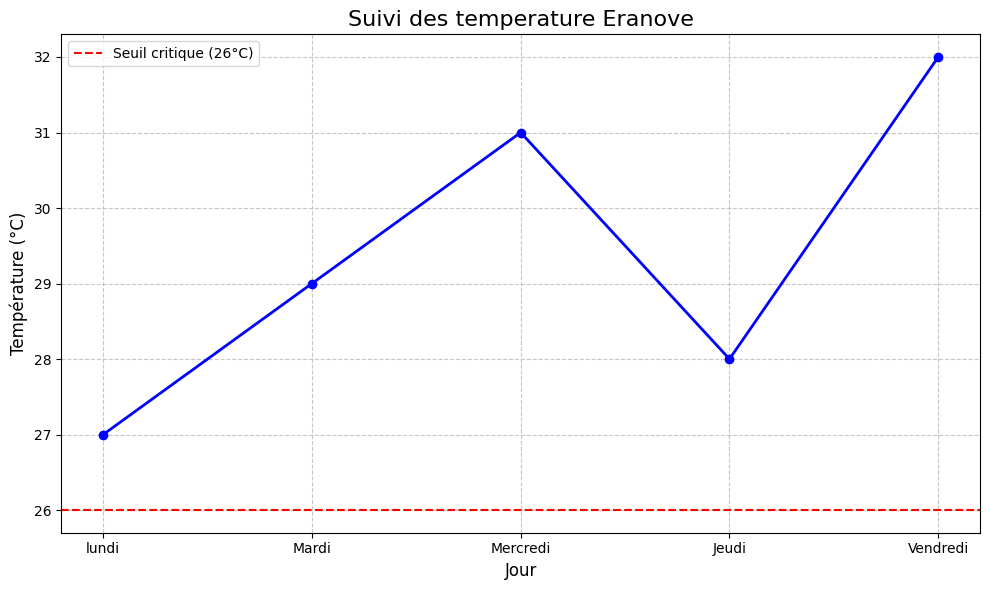

Graphique généré et sauvegardé comme 'graphique_temperatures.png'


In [6]:
# Programme de suivi de température ERANOVE

# l'utilisateur doit entrer le seuil critique de température
print("Bienvenue dans le programme de suivi de température ERANOVE.")
seuil = int(input("Veuillez Entrer le seuil critique de température: "))
    

# Nom du fichier CSV contenant les données de température
# Assurez-vous que le fichier CSV est dans le même répertoire que ce script
fichier_Temp = "temperatures.csv"
        
# Lire les données du fichier CSV
jours, temperatures = lire_fichierTemp(fichier_Temp)
    
        
# Afficher les données lues
print("\n--- DONNÉES DE TEMPÉRATURE ---")
for i in range(len(jours)):
    print(f"{jours[i]}: {temperatures[i]}°C")
        
# Calculer et afficher les statistiques
stats = calculStat(temperatures)
print("\n--- STATISTIQUES ---")
print(f"Température moyenne: {stats['moyenne']}°C")
print(f"Température minimale: {stats['min']}°C")
print(f"Température maximale: {stats['max']}°C")
        
# Détecter et afficher les températures critiques
jours_critiques = TemperatureCritiq(jours, temperatures, seuil)
print("\n--- ALERTES TEMPÉRATURE CRITIQUE ---")
if jours_critiques:
    print(f"Températures dépassant {seuil}°C les jours suivants:")
    for jour, temp in jours_critiques:
        print(f"- {jour}: {temp}°C")
else:
    print(f"Aucune température dépassant {seuil}°C détectée.")
        
# Générer le graphique
print("\nGénération du graphique...")
generer_graphique(jours, temperatures, seuil)
print("Graphique généré et sauvegardé comme 'graphique_temperatures.png'")
